In [19]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [20]:
files = glob.glob('../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243/*.txt')
files

#here is where the output will go 
path2 = '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243.csv'
files

['../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224241_Absorbance__0__090.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224241_Absorbance__1__091.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224242_Absorbance__0__092.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224242_Absorbance__1__093.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224243_Absorbance__0__094.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224243_Absorbance__1__095.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224244_Absorbance__0__096.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224244_Absorbance__1__097.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224245_Absorbance__0__098.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224245_Absorbance__1__099.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224246_Absorbance__0__100.txt',
 '../../../FeT_GOM22SU/FeT_BC_GOM22SU_2242_2243\\224246_Absorbance__1__101.txt',
 '../../../FeT_GOM22SU/FeT_B

In [21]:
def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [22]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

,224241_Absorbance__0__090.txt,224241_Absorbance__1__091.txt,224242_Absorbance__0__092.txt,224242_Absorbance__1__093.txt,224243_Absorbance__0__094.txt,224243_Absorbance__1__095.txt,224244_Absorbance__0__096.txt,224244_Absorbance__1__097.txt,224245_Absorbance__0__098.txt,224245_Absorbance__1__099.txt,...,224354_Absorbance__1__153.txt,224355_Absorbance__0__154.txt,224355_Absorbance__1__155.txt,224356_Absorbance__0__156.txt,224356_Absorbance__1__157.txt,224357_Absorbance__0__158.txt,224357_Absorbance__1__159.txt,224358_Absorbance__0__160.txt,224358_Absorbance__1__161.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,-101950.273203,-46112.032656,-83684.174113,-382446.417498,-146734.528237,-627011.480863,-81261.448180,-82311.353728,-206668.502781,-350285.667465,...,-287234.291926,-490.300981,-104740.934100,-626829.558897,-4138.984774,-1.096468e+06,-12585.458873,-8584.439279,-83477.166769,189
190,-99893.692374,-45179.009302,-81994.242014,-374741.317906,-143763.146696,-614430.874699,-79621.944541,-80648.530366,-202521.822537,-343257.395865,...,-281471.109214,-480.936669,-102640.263094,-614266.302623,-4056.969716,-1.074398e+06,-12333.980612,-8413.795262,-81805.099488,190
191,-97864.955030,-44258.655096,-80327.213471,-367140.406921,-140832.148697,-602019.685645,-78004.641213,-79008.251240,-198430.983687,-336323.770695,...,-275785.536574,-471.691983,-100567.868381,-601872.044074,-3976.045015,-1.052626e+06,-12085.874640,-8245.426490,-80155.509554,191
192,-95863.871411,-43350.883451,-78682.932232,-359642.975329,-137941.257957,-589776.765218,-76409.386874,-77390.362498,-194395.607681,-329484.150345,...,-270177.047887,-462.566159,-98523.558363,-589645.638880,-3896.203376,-1.031150e+06,-11841.118195,-8079.317702,-78528.244871,192
193,-93890.251758,-42455.607778,-77061.242045,-352248.313916,-135090.198197,-577700.964940,-74836.030199,-75794.710283,-190415.315969,-322737.893206,...,-264645.117034,-453.558428,-96507.141443,-577585.942669,-3817.437504,-1.009968e+06,-11599.688512,-7915.453636,-76923.153341,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,236.300186,61.064787,-4.565634,-122.140531,-12.525346,-122.138851,-20.528356,-11.383643,176.939531,175.797023,...,118.725733,2.293109,-3.419870,0.019004,-61.048379,-1.938247e+01,-116.423692,-63.920836,0.008542,876
877,250.072014,64.583536,-4.739566,-129.178635,-13.241717,-129.176955,-21.708352,-12.056531,187.257531,186.071540,...,125.633388,2.380075,-3.550319,0.019206,-64.567129,-2.051898e+01,-123.244381,-67.548596,0.008542,877
878,264.368751,68.234935,-4.916746,-136.482036,-13.984862,-136.480355,-22.932699,-12.755381,197.969010,196.738724,...,132.803904,2.468665,-3.683204,0.019407,-68.218527,-2.169904e+01,-130.326308,-71.311033,0.008542,878


In [23]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=7).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,224241,224242,224243,224244,224245,224246,224247,224248,224249,224250,...,224350,224351,224352,224353,224354,224355,224356,224357,224358,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,-74031.152930,-233065.295805,-386873.004550,-81786.400954,-278477.085123,-825454.501634,-178757.795310,-847845.571754,-261.024591,-136382.751580,...,-239400.677465,-90237.057363,-174427.452455,-555617.150986,-149570.205093,-52615.617541,-315484.271835,-554526.840870,-46030.803024,189
190,-72536.350838,-228367.779960,-379097.010698,-80135.237453,-272889.609201,-808849.223495,-175164.577200,-830775.852173,-255.521088,-133645.703447,...,-234597.788157,-88428.781796,-170910.949704,-544436.488759,-146569.923753,-51560.599881,-309161.636170,-543365.947732,-45109.447375,190
191,-71061.805063,-223733.810196,-371425.917171,-78506.446227,-267377.377191,-792468.143847,-171619.835495,-813936.791715,-250.094560,-130945.521816,...,-229859.569415,-86644.825665,-167442.027624,-533406.832287,-143610.035179,-50519.780182,-302924.044544,-532355.822783,-44200.468022,191
192,-69607.377431,-219162.953781,-363859.011588,-76899.874686,-261939.879013,-776309.738869,-168123.240975,-797326.821351,-244.744470,-128281.956718,...,-225185.582890,-84885.024331,-164020.362134,-522527.154892,-140690.265625,-49493.062261,-296770.921128,-521495.440758,-43303.781287,192
193,-68172.929768,-214654.777980,-356395.581568,-75315.370241,-256576.604587,-760372.484739,-164674.464419,-780944.372053,-239.470283,-125654.758181,...,-220575.390235,-83149.213156,-160645.629151,-511796.429894,-137810.341343,-48480.349935,-290701.690087,-510783.776391,-42419.303489,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,148.682486,-63.353083,-67.332098,-15.955999,176.368277,-63.352031,58.221604,58.793775,-90.452174,-29.379633,...,-29.100162,-31.384712,-61.058614,0.589985,89.046375,-0.563381,-30.514687,-67.903081,-31.956147,876
877,157.327775,-66.959101,-71.209336,-16.882442,186.664535,-66.958049,61.631949,62.225861,-95.687118,-31.095525,...,-30.805334,-33.176850,-64.577565,0.611928,94.227116,-0.585122,-32.273962,-71.881682,-33.770027,877
878,166.301843,-70.699391,-75.232609,-17.844040,197.353867,-70.698339,65.172912,65.788971,-101.120223,-32.876929,...,-32.575815,-35.035922,-68.229164,0.634277,99.605003,-0.607270,-34.099560,-76.012672,-35.651246,878


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

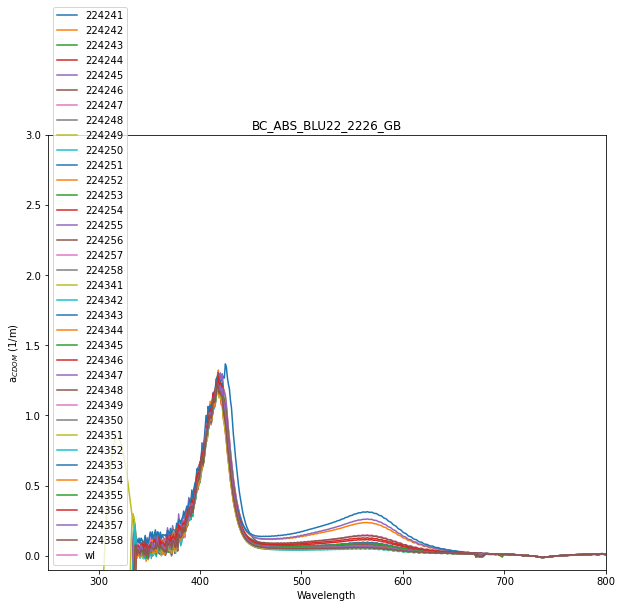

In [24]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")


In [25]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    
    abs_562 = df[(df['wl']==562)][col].mean()
    
    ydata = df[(df['wl']>=450) & (df['wl']<=700)][col]
    xdata = df[(df['wl']>=450) & (df['wl']<=700)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    inter = scipy.integrate.simps(ydata, x=xdata, even='avg')
    
    dict = {'sample':[columnName],
        'abs_562':[abs_562], 
        'intagration':[inter],}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')
ss_outs.to_csv(path2)

ss_outs

,abs_562,intagration
sample,,
224241,0.087129,13.894344
224242,0.235184,29.628037
224243,0.067444,10.421034
224244,0.071072,11.204978
224245,0.259714,31.739312
224246,0.092954,13.576945
224247,0.146751,19.607349
224248,0.064054,10.205826
224249,0.069891,10.932751


EXPERIMENTAL